# 

# Actividad 1 - Module 2 - Computer Vision
- José Miguel Luna Vega - A01706424
- Israel Iván Arroyo Parada - A01706190
- Jesús Misael Reséndiz Cruz - A01706166
- Carlos Emilio Magaña Arias - A01701466

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.util import random_noise
from skimage.color import rgb2gray, gray2rgb
from scipy.ndimage import uniform_filter, median_filter, gaussian_filter
from scipy.ndimage import correlate, convolve
from scipy.io import loadmat
from skimage.feature import match_template
from matplotlib.patches import Rectangle
%matplotlib inline


# 

## Task 1: Merge images

In [22]:
path = os.path.join('images', 'billface.jpg')
bill = imread(path)
bill_grey = rgb2gray(bill)

path = os.path.join('images', 'steve.jpg')
steve = imread(path)
steve_grey = rgb2gray(steve)

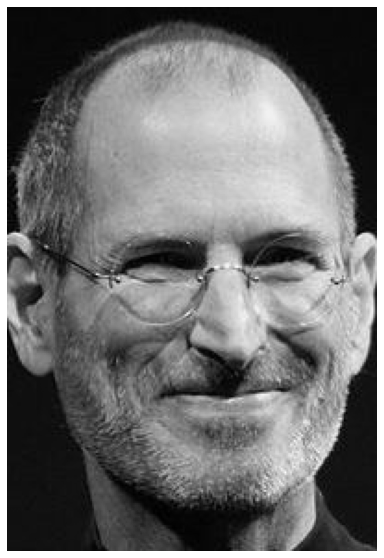

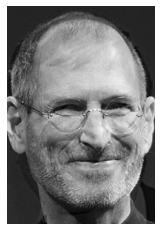

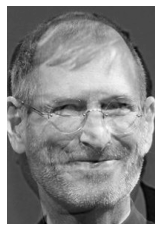

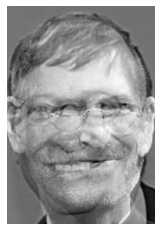

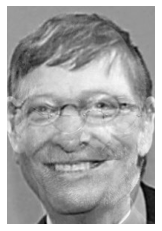

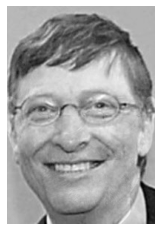

In [23]:
def merge_images(im1, im2, N, p):
    plt.figure(figsize=(10, 10))
    c = 1/N
    c_im1 = 1.0
    c_im2 = 0.0
    for i in range(N):
        temp1 = im1*c_im1
        temp2 = im2*c_im2
        img = temp1+temp2
        plt.imshow(img, cmap=plt.cm.gray), plt.axis('off')
        plt.draw()
        plt.pause(p)
        c_im1 -= c
        c_im2 += c



merge_images(steve_grey, bill_grey, 6, 0.5)
# plt.imshow(img, cmap=plt.cm.gray), plt.axis('off')
# plt.show()
    # img.set_data()

### Comparación
La solución sigue la misma idea, con la diferencia en cómo se obtiene la imagen. Nosotros tenemos dos constantes que nos dicen qué imagen va a dominar. En cada iteración modificamos dichas variables para que cambien y hagan el efecto de merge. Ambas soluciones tienen un tiempo de O(n), aunque, por usar librerias mejor optimizadas, la solución del profesor puede tener un menor tiempo de ejecución, en general.


## Task 2: Gaussian vs Box filter

In [24]:
def imshow_gray(image, size=(10, 10)):
    plt.figure(figsize=size)
    plt.imshow(image, cmap=plt.cm.gray), plt.axis('off')
    plt.show()

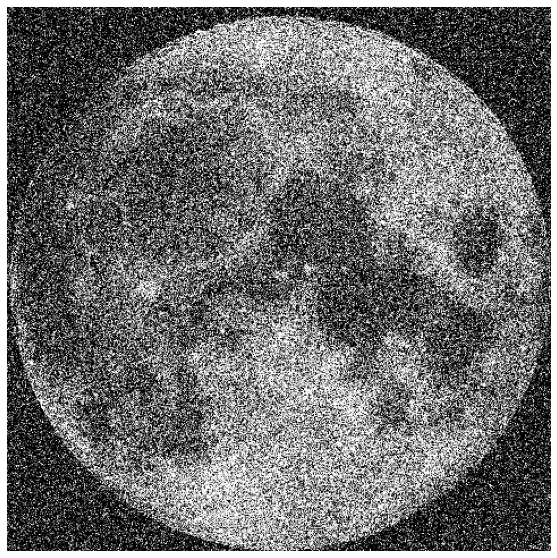

In [25]:
moon = imread('images/480px-Full_moon.jpeg')
moon_grey = rgb2gray(moon)
gaussian_moon2 = random_noise(moon_grey, 'gaussian', var = 0.2)
imshow_gray(gaussian_moon2)

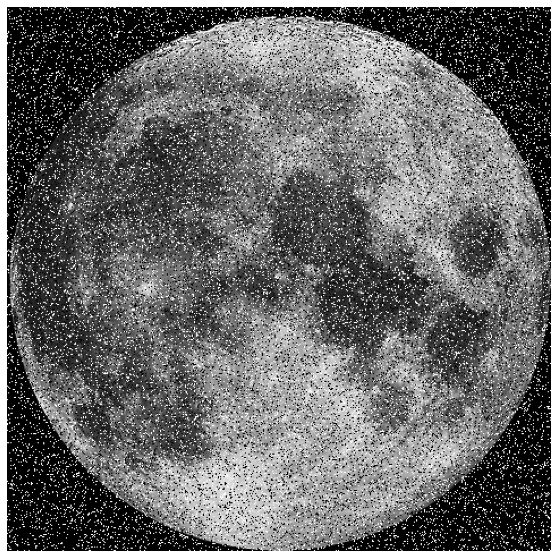

In [26]:
sp_moon3 = random_noise(moon_grey, 's&p', amount=0.2)
imshow_gray(sp_moon3)

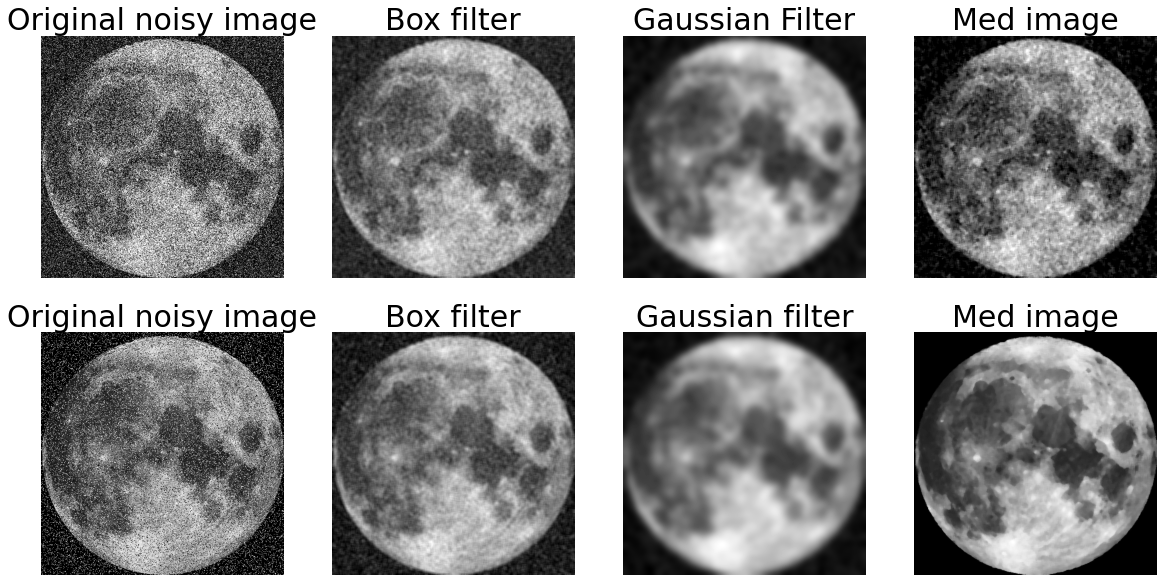

In [27]:
filter_size = 7
title_size = 30

plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
plt.imshow(gaussian_moon2, cmap=plt.cm.gray), plt.axis('off')
plt.title('Original noisy image', size=title_size)

plt.subplot(2, 4, 2)
box_filtered = uniform_filter(gaussian_moon2, filter_size)
plt.imshow(box_filtered, cmap=plt.cm.gray), plt.axis('off')
plt.title('Box filter', size=title_size)

plt.subplot(2, 4, 3)
gaussian_filtered = gaussian_filter(gaussian_moon2, filter_size)
plt.imshow(gaussian_filtered, cmap=plt.cm.gray), plt.axis('off')
plt.title('Gaussian Filter', size=title_size)

plt.subplot(2, 4, 4)
med_filtered = median_filter(gaussian_moon2, filter_size)
plt.imshow(med_filtered, cmap=plt.cm.gray), plt.axis('off')
plt.title('Med image', size=title_size)

# -------------------

plt.subplot(2, 4, 5)
plt.imshow(sp_moon3, cmap=plt.cm.gray), plt.axis('off')
plt.title('Original noisy image', size=title_size)

plt.subplot(2, 4, 6)
box_filtered = uniform_filter(sp_moon3, filter_size)
plt.imshow(box_filtered, cmap=plt.cm.gray), plt.axis('off')
plt.title('Box filter', size=title_size)

plt.subplot(2, 4, 7)
gaussian_filtered = gaussian_filter(sp_moon3, filter_size)
plt.imshow(gaussian_filtered, cmap=plt.cm.gray), plt.axis('off')
plt.title('Gaussian filter', size=title_size)

plt.subplot(2, 4, 8)
med_filtered = median_filter(sp_moon3, filter_size)
plt.imshow(med_filtered, cmap=plt.cm.gray), plt.axis('off')
plt.title('Med image', size=title_size)

plt.show()


### Comparación
Primeramente la diferencia radica en que la implementación del profesor lo hace por medio de una función lo cual serviría para cualquier imagen cada vez que mandemos a llamarla con el parámetro de dicha imágen. La asignación de variables de los filtros son las mismas o siguen la misma lógica, también se usan las mismas funciones importadas por scipy.ndimage, pero por ser función, la sintaxis está acoplada para ello, como por ejemplo, la forma en la que se grafica es a través de variables incrementales.

## Task 4: Find Waldo

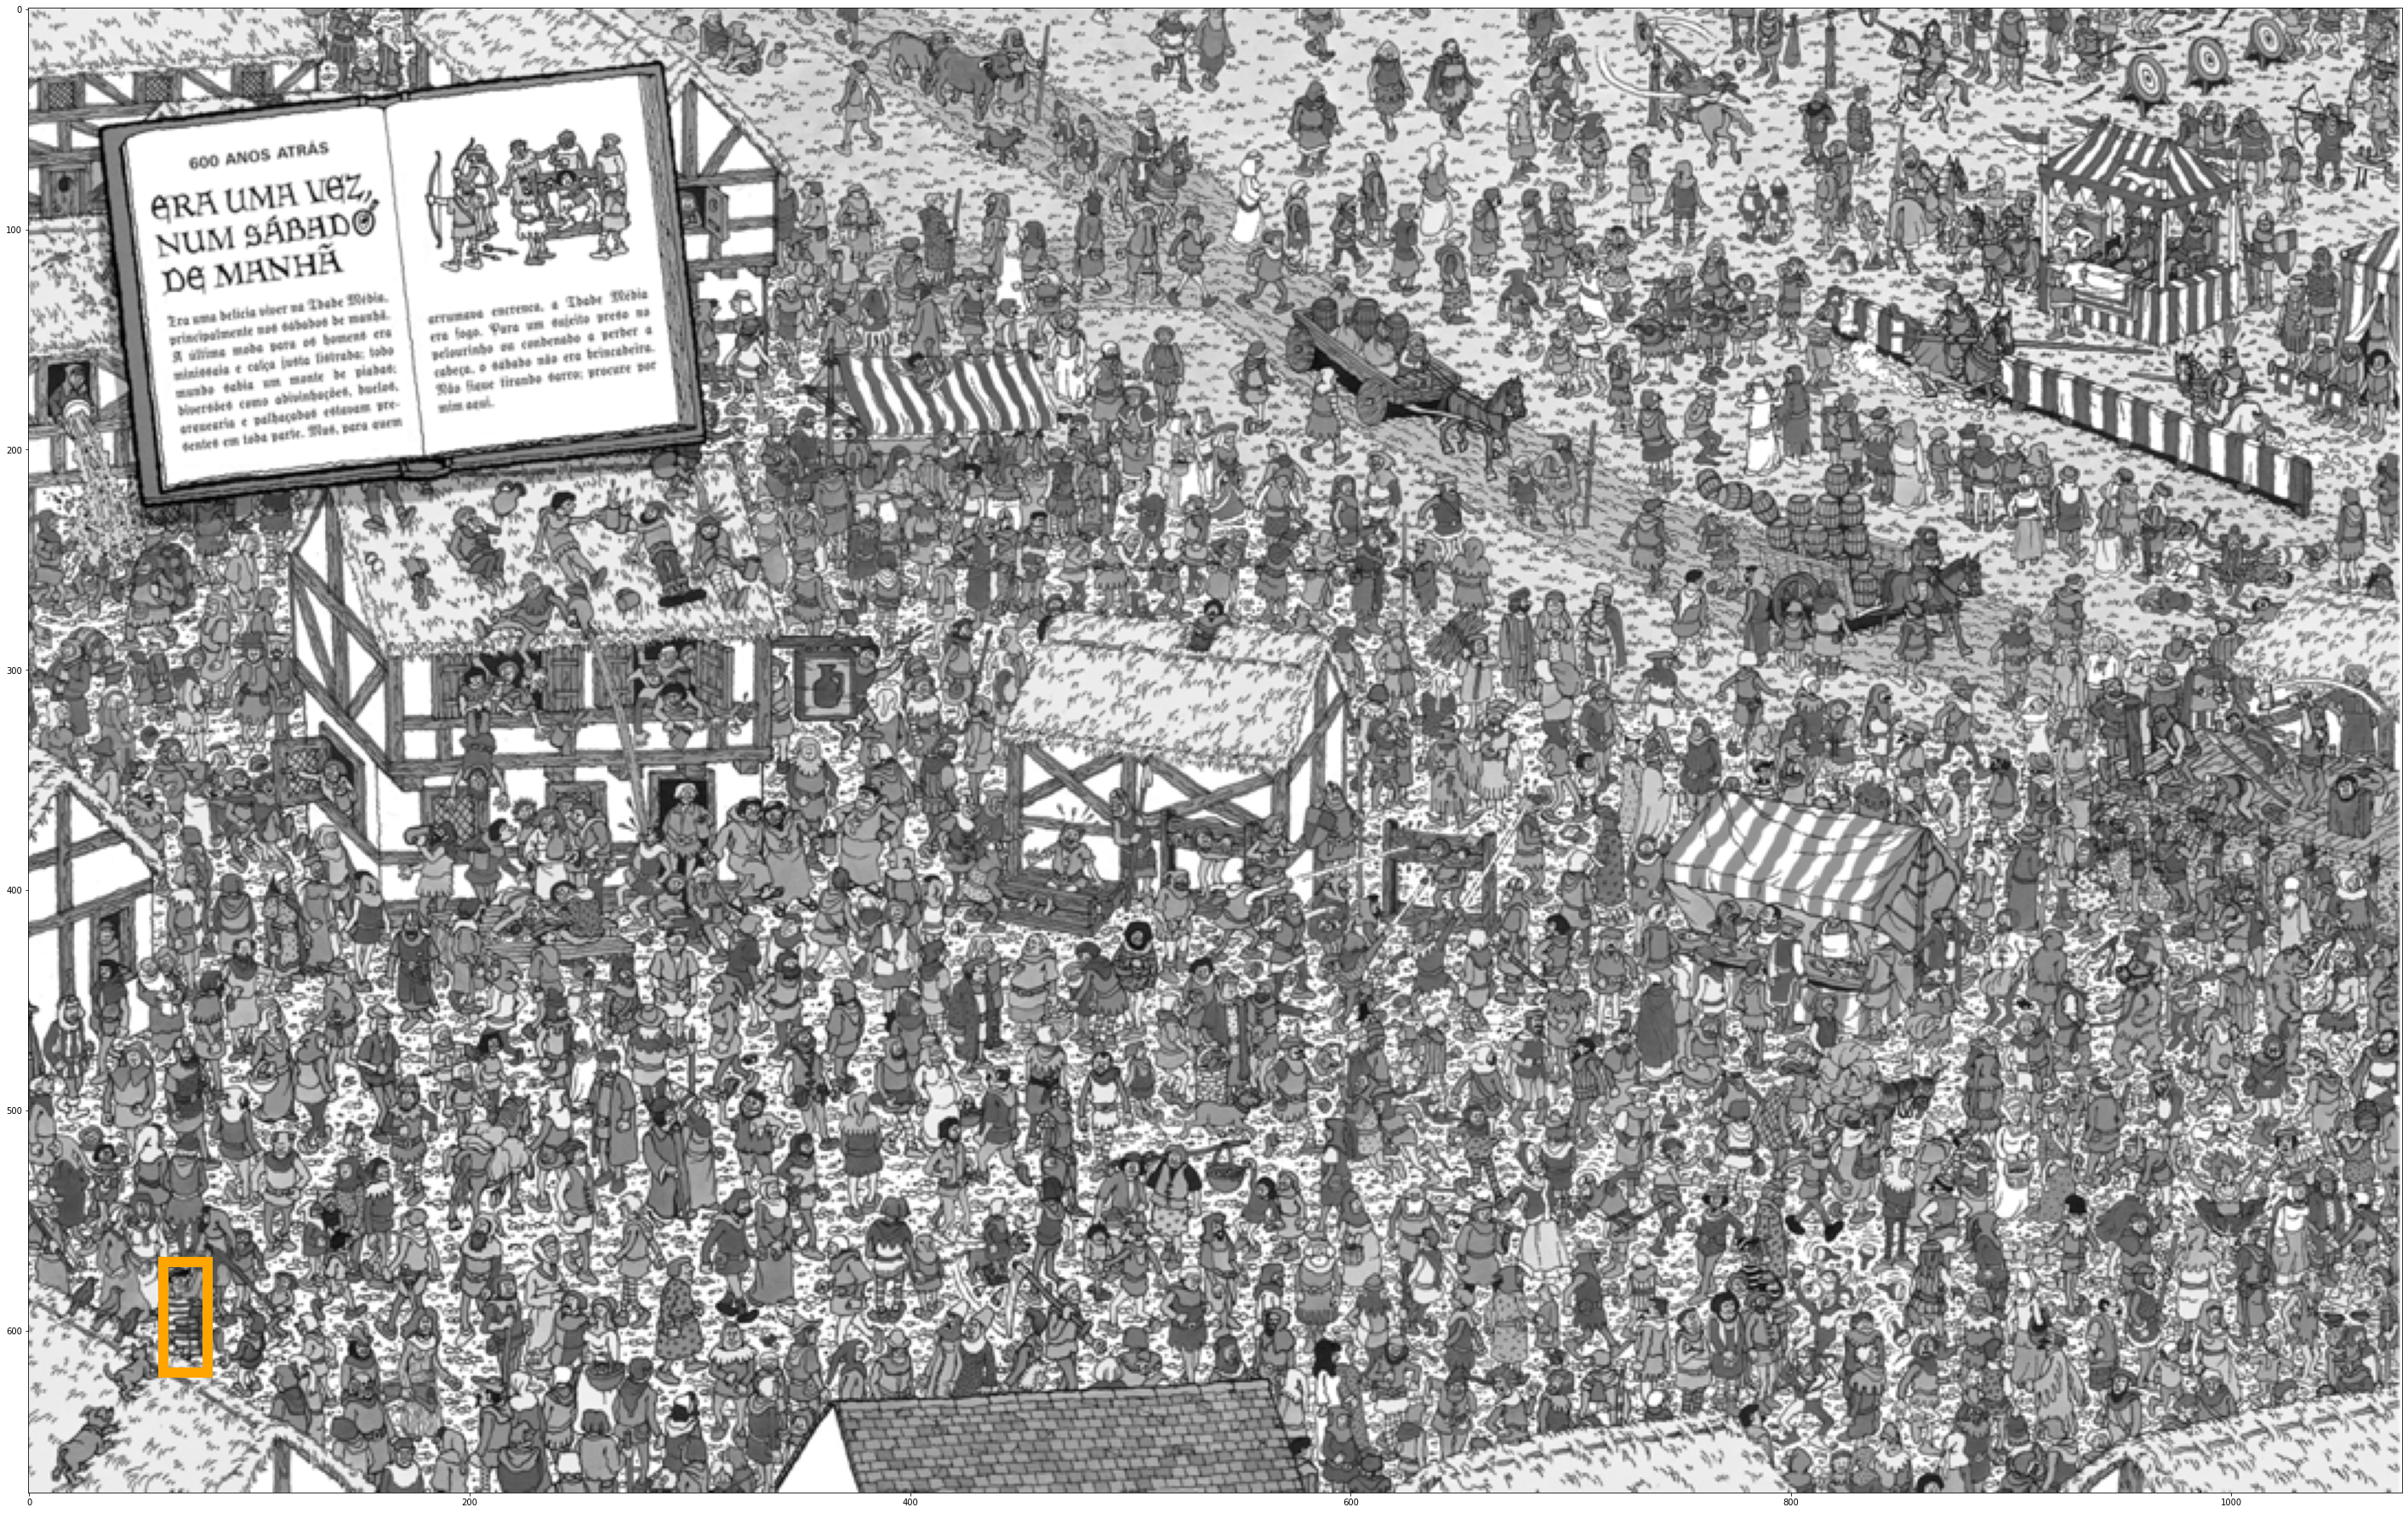

In [28]:
img = loadmat('waldoExample2.mat')
waldo = img['waldo']
extract = img['extract']
waldo_img = rgb2gray(waldo)
extract_img = rgb2gray(extract)

def match_pattern(image, extract_img):
    match = match_template(image, extract_img)
    ij = np.unravel_index(np.argmax(match), match.shape)
    x, y = ij[::-1]
    fig, ax = plt.subplots(figsize=(50,50))
    ax.imshow(image, cmap=plt.cm.gray)
    ax.add_patch(Rectangle((x,y), 20, 50, ec='orange', lw=12, fc='none'))
    plt.show()

match_pattern(waldo_img,extract_img)


### Comparación
La función en general tiene una estructura parecida a la del profesor, ya que la base principal para encontrar la correlación entre el patrón de Waldo y la información de la imágen está basada en la función “match_pattern”, las diferencias se encuentran en parte de cómo se guardan los patrones de Waldo y de la imágen, pero la diferencia principal está al momento de dibujar el rectángulo con el resultado, ya que el profesor ubica las coordenadas para dibujarlo tomando valores máximos directamente de las matrices del resultado, en cambio, nosotros tomamos únicamente el índice del valor máximo de la correlación y nos basamos en la figura esperada del resultado para ajustar el dibujo del resto del rectángulo, pero al final, ambas funciones tiene el mismo resultado, ya que la coordenada de referencia está situada en la esquina izquierda superior para dibujar el rectángulo, el resto de diferencias son pequeños detalles y la forma de imprimir las imágenes y el resultado, pero los datos son los mismos, además, la ruta para tomar los archivos de datos iniciales son diferentes debido a la diferencia de ubicación de estos en cada espacio de trabajo, pero el archivo es el mismo en ambos casos.